In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-04-22 09:33:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  39.9MB/s    in 4.8s    

2021-04-22 09:34:01 (39.9 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-04-22 09:34:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving 

In [ ]:
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
import os

TRAIN_DIR = '/tmp/rps'
VAL_DIR =  '/tmp/rps-test-set'

rock_dir = os.path.join(TRAIN_DIR,'rock')
paper_dir = os.path.join(TRAIN_DIR, 'paper')
scissors_dir = os.path.join(TRAIN_DIR, 'scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)
print('rock images:', len(rock_files))
print('paper images:', len(paper_files))
print('scissors images:', len(scissors_files))

rock images: 840
paper images: 840
scissors images: 840


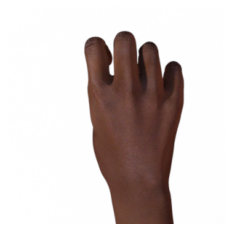

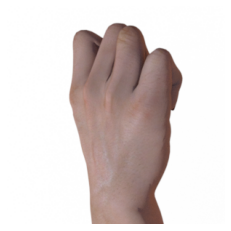

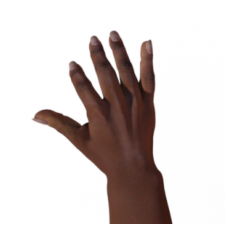

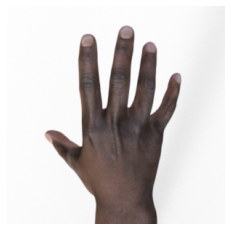

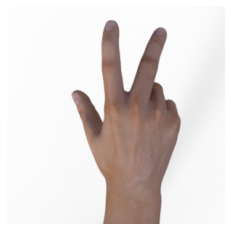

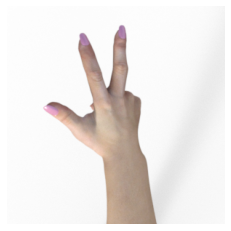

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

pic_index = np.random.randint(2,840)
next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissor = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

# Create a list 
for i, img_path in enumerate(next_rock+next_paper+next_scissor):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
list(enumerate(next_rock+next_paper+next_scissor))

[(0, '/tmp/rps/rock/rock02-052.png'),
 (1, '/tmp/rps/rock/rock04-063.png'),
 (2, '/tmp/rps/paper/paper03-095.png'),
 (3, '/tmp/rps/paper/paper07-065.png'),
 (4, '/tmp/rps/scissors/scissors03-020.png'),
 (5, '/tmp/rps/scissors/testscissors02-095.png')]

Already rescaled?

In [ ]:
img = mpimg.imread(next_rock[1])
(np.asarray(img)>2).any()

False

# Data generator and preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    #rescale=1./255
)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
  target_size = (150,150), 
  class_mode = 'categorical',
  batch_size = 126)

val_generator = validation_datagen.flow_from_directory(VAL_DIR,
  target_size = (150,150), 
  class_mode = 'categorical',
  batch_size = 126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Train the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20,
  validation_data=val_generator, verbose=2, validation_steps=3)

Epoch 1/25
20/20 - 37s - loss: 139.5932 - accuracy: 0.3579 - val_loss: 1.0862 - val_accuracy: 0.3333
Epoch 2/25
20/20 - 20s - loss: 1.0630 - accuracy: 0.4024 - val_loss: 0.9664 - val_accuracy: 0.5108
Epoch 3/25
20/20 - 19s - loss: 3.7253 - accuracy: 0.4341 - val_loss: 1.0738 - val_accuracy: 0.4812
Epoch 4/25
20/20 - 20s - loss: 1.2969 - accuracy: 0.3972 - val_loss: 1.0351 - val_accuracy: 0.4731
Epoch 5/25
20/20 - 20s - loss: 1.0022 - accuracy: 0.4885 - val_loss: 0.9082 - val_accuracy: 0.5484
Epoch 6/25
20/20 - 20s - loss: 1.1497 - accuracy: 0.4663 - val_loss: 1.0942 - val_accuracy: 0.3306
Epoch 7/25
20/20 - 19s - loss: 1.3371 - accuracy: 0.4175 - val_loss: 4.1819 - val_accuracy: 0.3333
Epoch 8/25
20/20 - 20s - loss: 3.1576 - accuracy: 0.4373 - val_loss: 0.7985 - val_accuracy: 0.6505
Epoch 9/25
20/20 - 20s - loss: 0.9907 - accuracy: 0.5099 - val_loss: 0.9204 - val_accuracy: 0.7608
Epoch 10/25
20/20 - 20s - loss: 1.6087 - accuracy: 0.4865 - val_loss: 0.9739 - val_accuracy: 0.3468
Epoch 1

In [ ]:
model.save('my_model.h5')

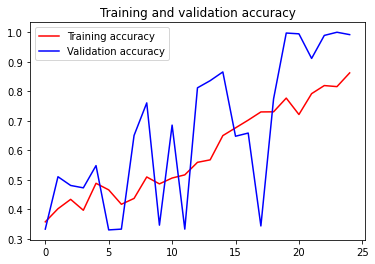

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()